In [1]:
import scanpy as sc
import torch

from SHARE_topic import SHARE_topic

In [2]:
if torch.cuda.is_available():
    device='cuda'
else:
    device='cpu'
print(f'Running on: {device}')

Running on: cuda


In [3]:
# rna = sc.read_h5ad('../B_lymphoma_Example/rna_B_lympho.h5ad')
# atac =sc.read_h5ad('../B_lymphoma_Example/atac_B_lympho.h5ad')
path = '/data/nelkazwi/share-topic/lymphoma_data/'
rna = sc.read_h5ad(path+'rna_B_lympho.h5ad')
atac =sc.read_h5ad(path+'atac_B_lympho.h5ad')
gamma=1
tau=0.5
n_topics=20
n_samples=100
n_burnin=1
batch_size=500
alpha=50/n_topics
beta=0.1


In [4]:
st_obj = SHARE_topic(atac, rna, n_topics, alpha, beta, gamma, tau)
#theta, lam, phi = st_obj.fit(batch_size,n_samples,n_burnin,dev= device,save_data=False,path="")

In [5]:

path_theta = "/scratch/nelkazwi/share-topic/lymphoma_data/"+str(n_topics)+"_topics/theta_"+str(n_topics)+".txt"
path_lam = "/scratch/nelkazwi/share-topic/lymphoma_data/"+str(n_topics)+"_topics/lam_"+str(n_topics)+".txt"
path_phi = "/scratch/nelkazwi/share-topic/lymphoma_data/"+str(n_topics)+"_topics/phi_"+str(n_topics)+".txt"

theta = torch.load(path_theta)
lam = torch.load(path_lam)
phi = torch.load(path_phi)
theta = theta[0:,:,:]
lam = lam[0:,:,:]
phi = phi[0:,:,:]

In [ ]:
#run st_obj.sc_to_tensor() in case you only want to compute the WAIC with saved theta, lambda, and phi tensors
waic = st_obj.WAIC (batch_size, theta, lam, phi, device)

In [6]:
path = "/scratch/nelkazwi/share-topic/lymphoma_data/"+str(n_topics)+"_topics"
rna, m_theta, m_lam, m_phi = st_obj.share_topic_output(rna, n_topics, path, burnin_samples=50)

/u/n/nelkazwi/miniforge3/envs/patato/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


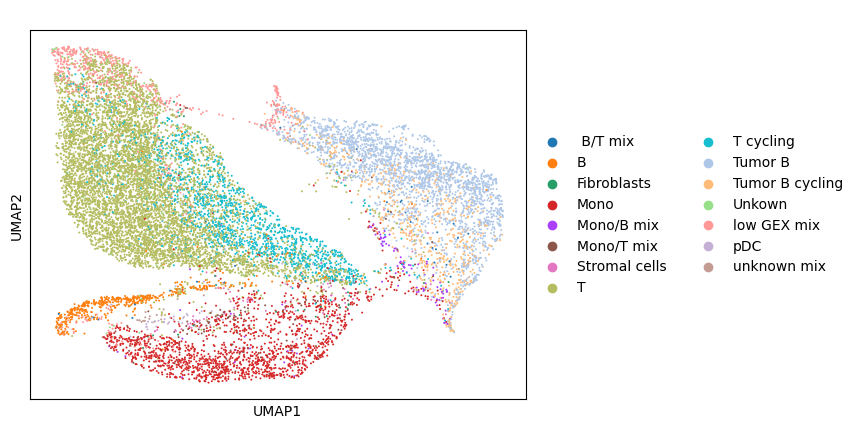

In [7]:
st_obj.cell_types_visualization(rna, key="cell_types")

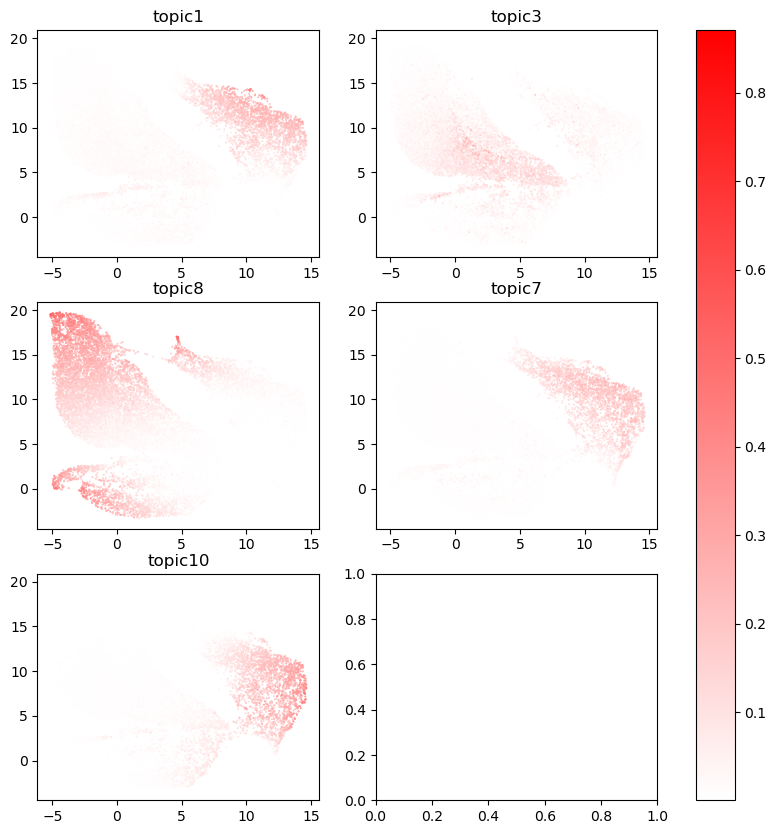

In [14]:
topics = [1,3,8,7,10]
st_obj.topic_cell_visualization(rna,topics, m_theta,nrows=3,ncols=2,figsize=(10,10))

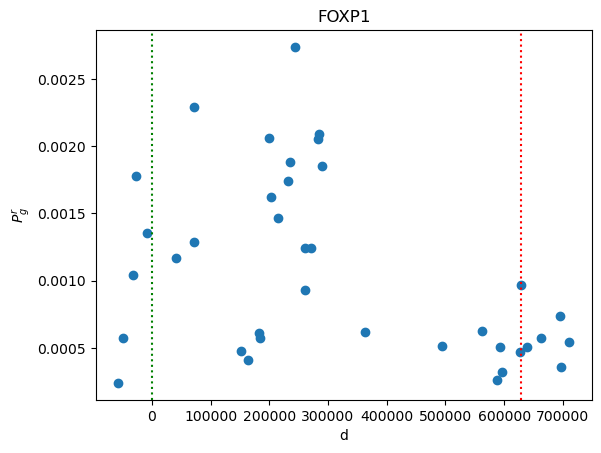

In [8]:
gene_name ="FOXP1"
bed_file = "/data/nelkazwi/SHARE-Topic/Tutorial/genes_regions.bed"
STS_score_gene, distance, df_gene_regions_all_topic = st_obj.compute_gene_STS(gene_name,n_topics, path, bed_file, save_fig = True)

ploting..


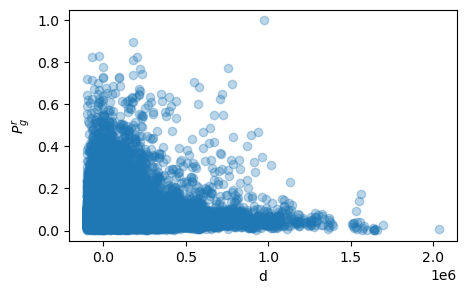

In [8]:
gene_list, STS_list, distance_list = st_obj.compute_STS(n_topics, path = path, bed_file = bed_file)